In [441]:
import numpy as np
import glob

import os
import matplotlib.pyplot as plt

import matplotlib.colors as colors
from profFuncs import*
import datetime 
import pandas as pd
import seaborn as sns

In [442]:
profF = glob.glob('radial_growth/sim_data_12_20/prof*')
profF

[]

In [443]:
sectF = glob.glob('radial_growth/sim_data_12_20/sect*')
sectF

['radial_growth/sim_data_12_20/sect_K200_M0.2_B5_G0.5_I100_2020-12-20-09-25-46.txt',
 'radial_growth/sim_data_12_20/sect_K200_M0.2_B2_G0.5_I100_2020-12-20-08-52-02.txt',
 'radial_growth/sim_data_12_20/sect_K200_M0.2_B7_G0.5_I100_2020-12-20-09-37-43.txt',
 'radial_growth/sim_data_12_20/sect_K200_M0.2_B1_G0.5_I100_2020-12-20-08-43-34.txt',
 'radial_growth/sim_data_12_20/sect_K200_M0.2_B7_G0.5_I100_2020-12-20-09-29-43.txt',
 'radial_growth/sim_data_12_20/sect_K200_M0.2_B1_G0.5_I100_2020-12-20-08-48-01.txt',
 'radial_growth/sim_data_12_20/sect_K200_M0.2_B2_G0.5_I100_2020-12-20-08-49-32.txt',
 'radial_growth/sim_data_12_20/sect_K200_M0.2_B1_G0.5_I100_2020-12-20-08-46-04.txt',
 'radial_growth/sim_data_12_20/sect_K200_M0.2_B5_G0.5_I100_2020-12-20-09-19-25.txt',
 'radial_growth/sim_data_12_20/sect_K200_M0.2_B2_G0.5_I100_2020-12-20-08-59-35.txt',
 'radial_growth/sim_data_12_20/sect_K200_M0.2_B2_G0.5_I100_2020-12-20-08-55-34.txt',
 'radial_growth/sim_data_12_20/sect_K200_M0.2_B7_G0.5_I100_2020-1

In [504]:
Bvalues = np.array([1,2,3,5,7])
data=np.zeros((125,4))
Bcounts= np.zeros(len(Bvalues)).astype(int)
cnt=0
for fs in sectF:
    B = int(fs.split('B')[1].split('_')[0])
    Bi = np.argwhere(B ==Bvalues)[0][0]
    sects = np.loadtxt(fs,delimiter=", ")[-1,1]
    maxsect= np.max(np.loadtxt(fs,delimiter=", ")[:,1])
    data[cnt,0] = Bcounts[Bi]
    data[cnt,1] = B
    #print(B)
    data[cnt,2] = sects
    data[cnt,3] = maxsect
    Bcounts[Bi]+=1
    cnt+=1
    
    

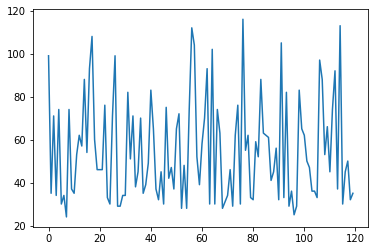

In [505]:
plt.plot(np.array([np.max(np.loadtxt(fs,delimiter=", ")[:,1]) for fs in sectF]))


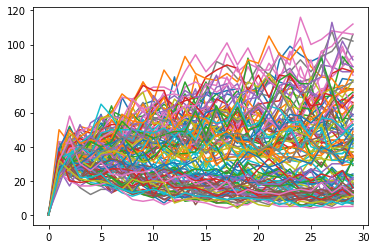

In [497]:
for fs in sectF:
    plt.plot(np.loadtxt(fs,delimiter=", ")[:,1])

In [506]:
df=pd.DataFrame(data=data,columns=['ID', 'B','Final Sectors','Max Sectors'])

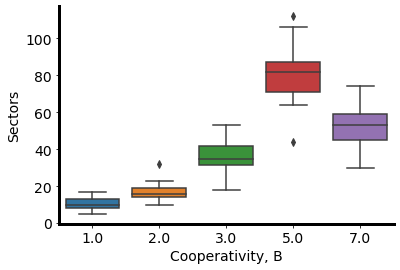

In [507]:
fig,ax =plt.subplots()
sns.boxplot(x = 'B',y='Final Sectors',data=df.loc[df['B']!=0,:],ax=ax)
ax.tick_params(labelsize=14) 

ax.set_ylabel('Sectors',fontsize=14)

ax.set_xlabel('Cooperativity, B',fontsize=14)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

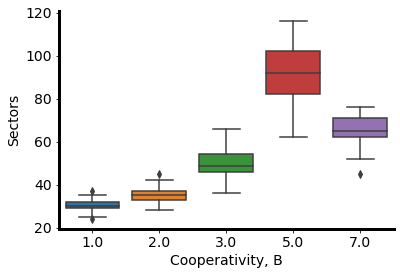

In [509]:
fig,ax =plt.subplots()
sns.boxplot(x = 'B',y='Max Sectors',data=df.loc[df['B']!=0,:],ax=ax)
ax.tick_params(labelsize=14) 

ax.set_ylabel('Sectors',fontsize=14)

ax.set_xlabel('Cooperativity, B',fontsize=14)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

In [410]:
for fs in profF:
    datetime.datetime((f.split('I')[1].split('_')[1].split('.')[0]))
    sects = np.loadtxt(fs,delimiter=", ")

In [394]:
# This dictionary defines the colormap
cdict = {'red':  ((
    0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'green': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }


# Create the colormap using the dictionary
GnRd = colors.LinearSegmentedColormap('GnRd', cdict)
GnRd.set_bad('grey')

In [395]:
600*600

360000

/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d pushed waves/profFuncs.py:81: RuntimeWarning: invalid value encountered in true_divide
  return arr_[:,:,0]/(arr_[:,:,1]+arr_[:,:,0])


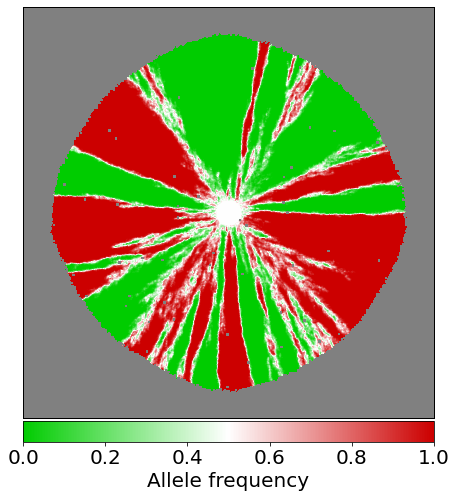

In [396]:
fig,ax=plt.subplots(figsize=(8,8))
freqArr_=arrToFreq(profFileToArray(profF[0],650,650))

im = ax.imshow(freqArr_.T,cmap=GnRd
               #,norm=normalize
               ,vmin=0)
ax.set_xticks([])
ax.set_yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.05)
#cbar_ticks= [1,10,100,1000,10000]
cbar = fig.colorbar(im
                    #t,icks=cbar_ticks
                    ,orientation='horizontal',cax=cax)
#cbar.ax.set_xticklabels(cbar_ticks,fontsize=12) 
cbar.ax.tick_params(labelsize=20) 
cbar.ax.set_xlabel('Allele frequency',fontsize=20)

for axis in ['bottom','left','top','right']:
    ax.spines[axis].set_linewidth(1)

In [397]:
sectsF = glob.glob('radial_growth/sim_data_12_20/sect*')

In [398]:
sectsF

['radial_growth/sim_data_12_20/sect_K200_M0.2_B7_G0.5_I100_2020-12-20-08-34-33.txt']

In [411]:
plt.plot(np.loadtxt(sectsF[0],delimiter=", ")[:,1])

OSError: radial_growth/sim_data_12_20/sect_K200_M0.2_B7_G0.5_I100_2020-12-20-08-34-33.txt not found.

In [261]:
np.loadtxt(sectsF[0],delimiter=", ")[:,1]

<ipython-input-261-9c84d3424165>:1: UserWarning: loadtxt: Empty input file: "radial_growth/sim_data_12_20/sect_K100_M0.2_B7_G0.3_I50_2020-12-20-08-11-22.txt"
  np.loadtxt(sectsF[0],delimiter=", ")[:,1]


IndexError: too many indices for array